In [1]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


import joblib

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", context="notebook")




In [24]:

df = pd.read_csv("Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [25]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [26]:

X = df.drop(columns=['label'])
y = df['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

n_classes = len(np.unique(y_encoded))
print({
    'train': X_train.shape,
    'val': X_val.shape,
    'test': X_test.shape,
    'classes': n_classes
})


{'train': (1408, 7), 'val': (352, 7), 'test': (440, 7), 'classes': 22}


In [ ]:

from typing import Dict, Any

def evaluate_model(name: str, model, X_train, y_train, X_val, y_val, X_test, y_test, label_encoder, cmap_color: str) -> Dict[str, Any]:
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    test_acc = accuracy_score(y_test, y_pred_test)

    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f"\n{name}")
    print(f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")


    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_color, cbar=False)
    plt.title(f"{name} - Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


    return {
        'Model': name,
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Test Accuracy': test_acc,
        'F1 Score': f1
    }



Logistic Regression
Train Acc: 0.9766 | Val Acc: 0.9688 | Test Acc: 0.9705
Precision: 0.9717 | Recall: 0.9705 | F1: 0.9703


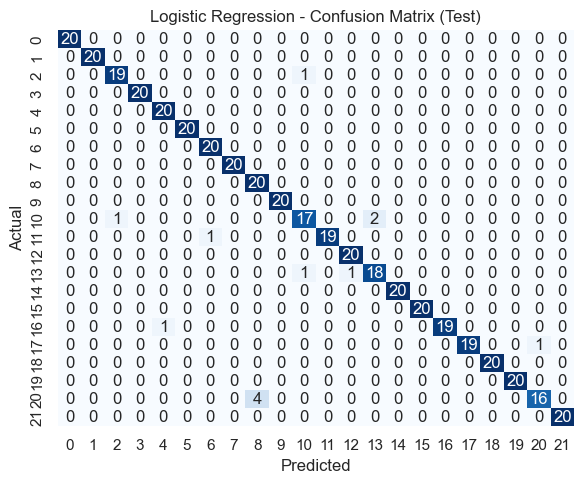


Decision Tree
Train Acc: 1.0000 | Val Acc: 0.9773 | Test Acc: 0.9886
Precision: 0.9891 | Recall: 0.9886 | F1: 0.9886


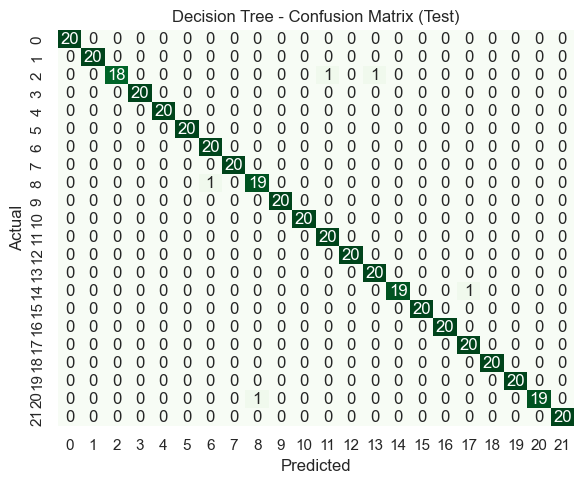


Random Forest
Train Acc: 1.0000 | Val Acc: 0.9943 | Test Acc: 0.9977
Precision: 0.9978 | Recall: 0.9977 | F1: 0.9977


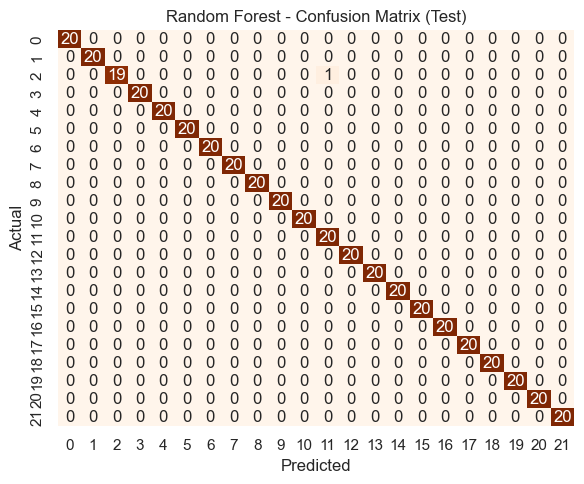


KNN
Train Acc: 0.9787 | Val Acc: 0.9602 | Test Acc: 0.9659
Precision: 0.9685 | Recall: 0.9659 | F1: 0.9657


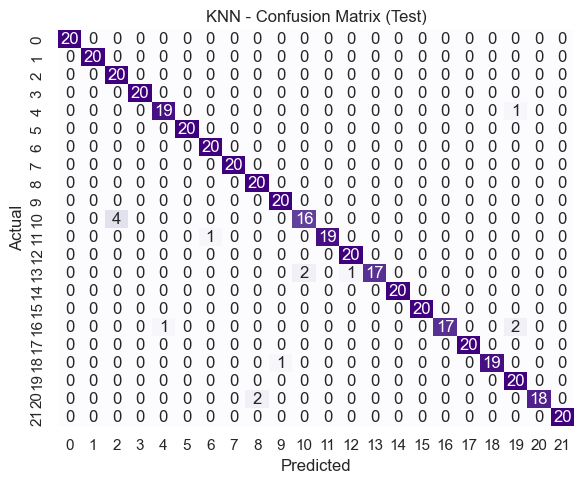


SVM
Train Acc: 0.9830 | Val Acc: 0.9659 | Test Acc: 0.9841
Precision: 0.9859 | Recall: 0.9841 | F1: 0.9840


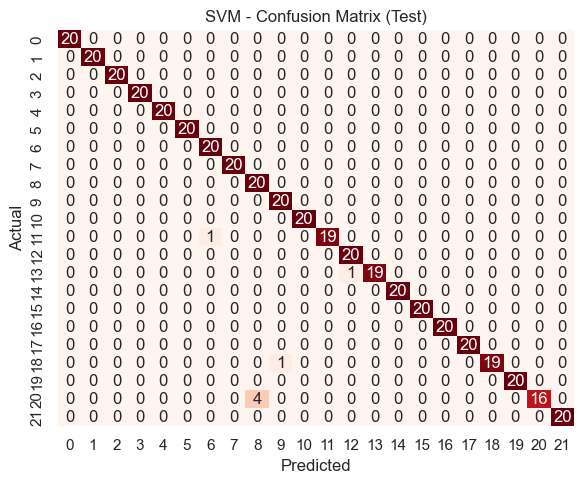


Naive Bayes
Train Acc: 0.9950 | Val Acc: 0.9943 | Test Acc: 0.9932
Precision: 0.9937 | Recall: 0.9932 | F1: 0.9932


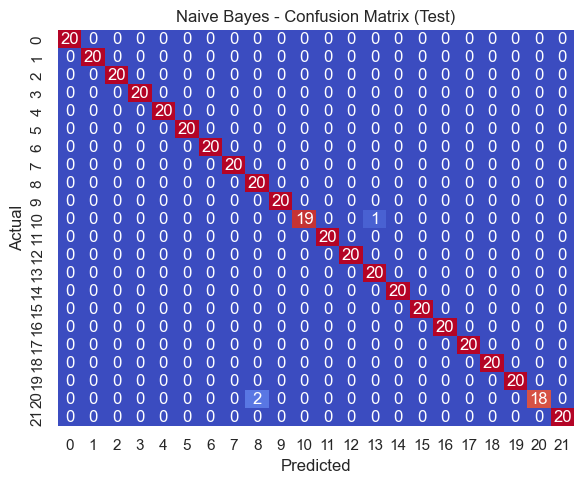


Overall Comparison:
                  Model  Train Accuracy  Val Accuracy  Test Accuracy  F1 Score
0  Logistic Regression        0.976562      0.968750       0.970455  0.970257
1        Decision Tree        1.000000      0.977273       0.988636  0.988569
2        Random Forest        1.000000      0.994318       0.997727  0.997726
3                  KNN        0.978693      0.960227       0.965909  0.965662
4                  SVM        0.982955      0.965909       0.984091  0.983995
5          Naive Bayes        0.995028      0.994318       0.993182  0.993169


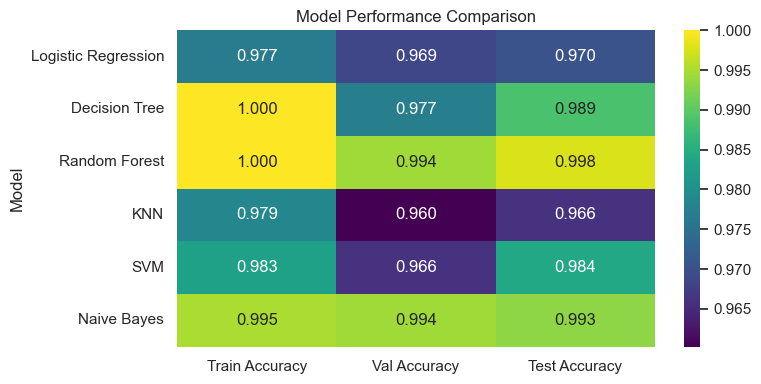


Best model: Random Forest


In [ ]:


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=False),
    'Naive Bayes': GaussianNB(),
}


colors = {
    'Logistic Regression': 'Blues',
    'Decision Tree': 'Greens',
    'Random Forest': 'Oranges',
    'KNN': 'Purples',
    'SVM': 'Reds',
    'Naive Bayes': 'coolwarm',
}


results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    res = evaluate_model(
        name, model,
        X_train_scaled, y_train,
        X_val_scaled, y_val,
        X_test_scaled, y_test,
        label_encoder,
        colors[name]
    )
    results.append(res)

results_df = pd.DataFrame(results)
print("\nOverall Comparison:\n", results_df)


plt.figure(figsize=(8,4))
sns.heatmap(results_df.set_index('Model')[['Train Accuracy', 'Val Accuracy', 'Test Accuracy']],
            annot=True, fmt='.3f', cmap='viridis')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()


best_row = results_df.sort_values('Test Accuracy', ascending=False).iloc[0]
best_name = best_row['Model']
print("\nBest model:", best_name)


best_model = models[best_name] 


Dataset loaded: (2200, 8)
Crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Training set: (1760, 7)
Test set: (440, 7)
MODEL TRAINING AND EVALUATION

Logistic Regression
Train Accuracy: 0.9739
Test Accuracy:  0.9727
Precision:      0.9740
Recall:         0.9727
F1-Score:       0.9725


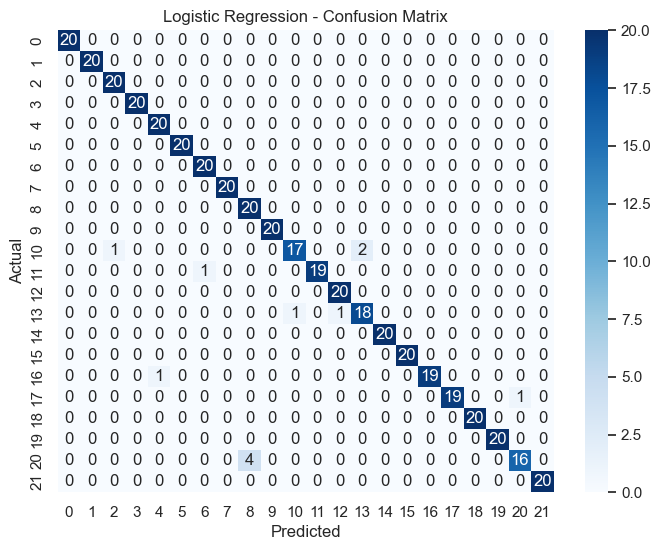


Decision Tree
Train Accuracy: 1.0000
Test Accuracy:  0.9795
Precision:      0.9806
Recall:         0.9795
F1-Score:       0.9794


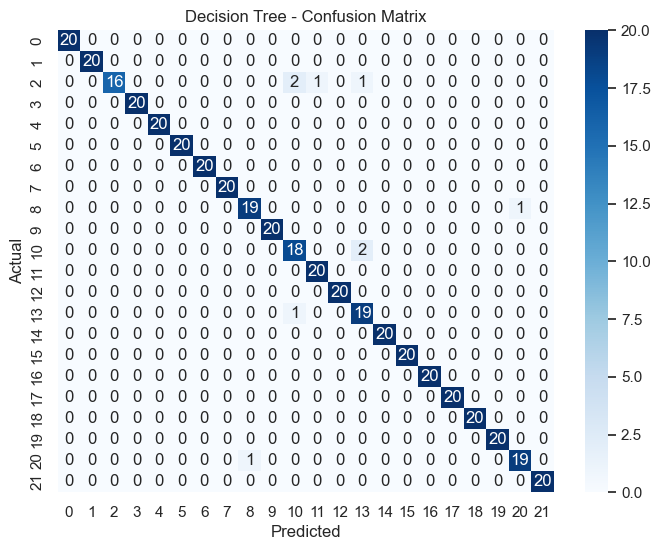


Random Forest
Train Accuracy: 1.0000
Test Accuracy:  0.9955
Precision:      0.9957
Recall:         0.9955
F1-Score:       0.9955


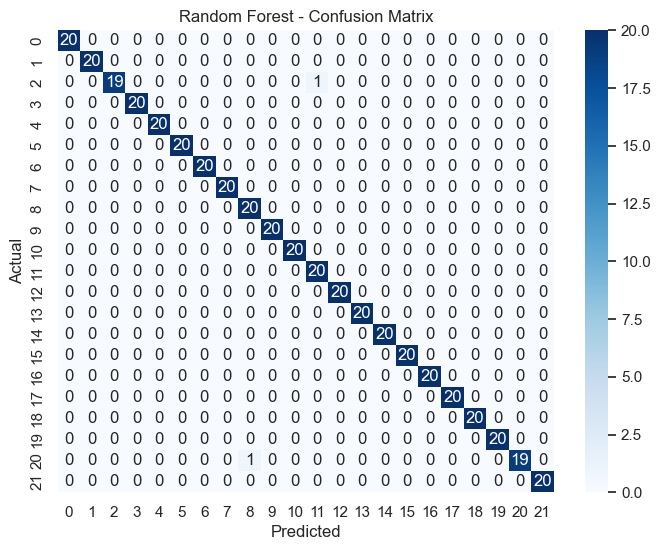


K-Nearest Neighbors
Train Accuracy: 0.9847
Test Accuracy:  0.9795
Precision:      0.9804
Recall:         0.9795
F1-Score:       0.9793


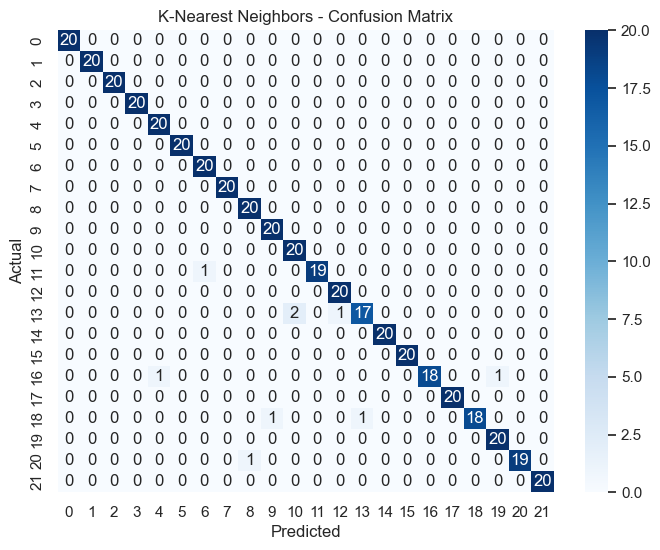


Support Vector Machine
Train Accuracy: 0.9858
Test Accuracy:  0.9841
Precision:      0.9856
Recall:         0.9841
F1-Score:       0.9840


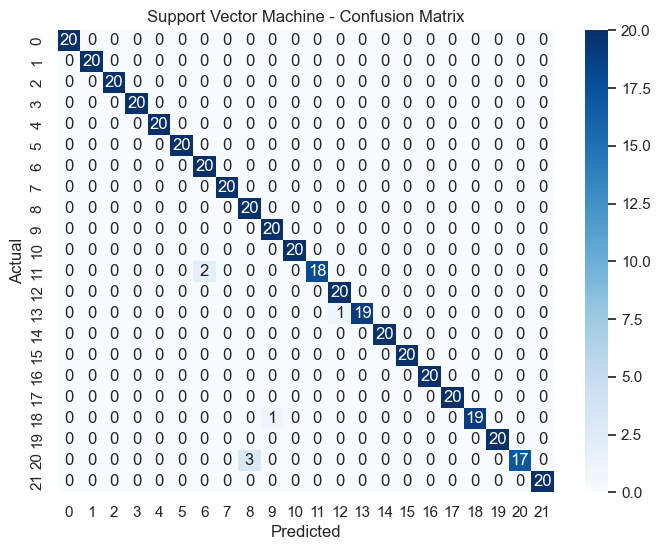


Naive Bayes
Train Accuracy: 0.9949
Test Accuracy:  0.9955
Precision:      0.9959
Recall:         0.9955
F1-Score:       0.9954


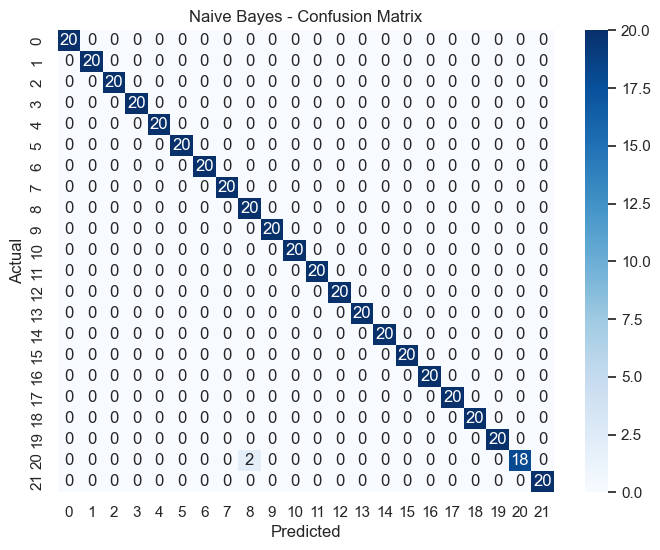


OVERALL PERFORMANCE COMPARISON
                    Model  Train_Accuracy  Test_Accuracy  Precision  Recall  \
0     Logistic Regression          0.9739         0.9727     0.9740  0.9727   
1           Decision Tree          1.0000         0.9795     0.9806  0.9795   
2           Random Forest          1.0000         0.9955     0.9957  0.9955   
3     K-Nearest Neighbors          0.9847         0.9795     0.9804  0.9795   
4  Support Vector Machine          0.9858         0.9841     0.9856  0.9841   
5             Naive Bayes          0.9949         0.9955     0.9959  0.9955   

   F1_Score  
0    0.9725  
1    0.9794  
2    0.9955  
3    0.9793  
4    0.9840  
5    0.9954  

🎯 BEST MODEL: Random Forest
📊 Test Accuracy: 0.9955

💾 Best model saved as 'best_crop_model.pkl'


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('Crop_recommendation.csv')
print("Dataset loaded:", df.shape)
print("Crops:", df['label'].unique())

# Data preprocessing
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print results
    print(f"\n{model_name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Precision:      {precision:.4f}")
    print(f"Recall:         {recall:.4f}")
    print(f"F1-Score:       {f1:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return {
        'Model': model_name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate all models
results = []
print("=" * 50)
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

for name, model in models.items():
    result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results.append(result)

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "=" * 50)
print("OVERALL PERFORMANCE COMPARISON")
print("=" * 50)
print(results_df.round(4))

# Find best model
best_model_idx = results_df['Test_Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = models[best_model_name]

print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"📊 Test Accuracy: {results_df.loc[best_model_idx, 'Test_Accuracy']:.4f}")

# Save the best model and preprocessing objects
joblib.dump(best_model, 'best_crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("\n💾 Best model saved as 'best_crop_model.pkl'")